## Listing Embedding

### 1. Importing datasets

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing review data and listing data
review_df = pd.read_csv('Dataset/airbnb_reviews.csv')
listings_df = pd.read_csv('Dataset/airbnb_listings.csv')

In [3]:
#display top 5 rows of review data
review_df.head()

,listing_id,date,reviewer_id
0,3344,2009-05-09,12016
1,3344,2009-11-29,40724
2,3344,2009-12-16,58506
3,3344,2011-06-01,583926
4,3344,2011-06-04,503189


In [4]:
#dimension of review dataset
review_df.shape

(7777766, 3)

In [5]:
#display top 5 rows of listings data
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,3344,"White House/Center City, 1 roommate",4957,A.J.,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90126,-77.02857,Private room,48,306,11,2016-08-31,0.09,2,363,washington
1,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,NaN,"Shaw, Logan Circle",38.91046,-77.01933,Entire home/apt,433,2,165,2019-06-30,1.29,5,321,washington
2,3662,Vita's Hideaway II,4645,Vita,NaN,Historic Anacostia,38.86193,-76.98963,Private room,65,2,36,2019-04-14,0.36,3,274,washington
3,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,NaN,"Howard University, Le Droit Park, Cardozo/Shaw",38.91842,-77.02750,Private room,75,2,79,2018-07-25,1.50,1,365,washington
4,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86314,-76.98836,Private room,55,2,70,2019-05-18,0.66,3,235,washington


In [6]:
#dimension of listing data
listings_df.shape

(239207, 17)

In [7]:
listings_df.drop_duplicates(subset=['id'],inplace=True)

### 2. Merging review and listing dataset

In [8]:
#merge listings and reviews on listing id
airbnb_df = pd.merge(left=review_df, right=listings_df, how='left',left_on='listing_id',right_on='id')

In [9]:
airbnb_df.columns

Index(['listing_id', 'date', 'reviewer_id', 'id', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'city'],
      dtype='object')

In [10]:
airbnb_df = airbnb_df[['listing_id', 'date', 'reviewer_id', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights','number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'city']]

In [11]:
#convert listing to string
airbnb_df['listing_id'] = airbnb_df['listing_id'].astype(str)

### 3. Selecting reviewers with at least 8 reviews

In [12]:
review_agg = airbnb_df.groupby('reviewer_id')['listing_id'].agg({'nunique','count'})

In [13]:
review_agg.head()

,nunique,count
reviewer_id,,
1,9,9
2,5,5
3,19,19
14,2,2
15,2,2


In [14]:
#select reviewers who have reviewed at least 8 bookings
reviewer_8 = review_agg.loc[review_agg['nunique'] >= 8].index

In [15]:
print(reviewer_8.shape)

(14767,)


In [16]:
reviewer_8_df = airbnb_df.loc[airbnb_df.reviewer_id.isin(reviewer_8)]

In [17]:
reviewer_8_df.head()

,listing_id,date,reviewer_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
88,3362,2012-01-26,361449,"Shaw, Logan Circle",38.91046,-77.01933,Entire home/apt,433,2,165,1.29,5,321,washington
142,3362,2018-03-06,6778344,"Shaw, Logan Circle",38.91046,-77.01933,Entire home/apt,433,2,165,1.29,5,321,washington
185,3662,2011-07-18,752062,Historic Anacostia,38.86193,-76.98963,Private room,65,2,36,0.36,3,274,washington
272,3670,2018-03-15,127704962,"Howard University, Le Droit Park, Cardozo/Shaw",38.91842,-77.02750,Private room,75,2,79,1.50,1,365,washington
281,3670,2018-05-04,127704962,"Howard University, Le Droit Park, Cardozo/Shaw",38.91842,-77.02750,Private room,75,2,79,1.50,1,365,washington


In [18]:
review_sorted = reviewer_8_df.sort_values(by=['reviewer_id','date']).reset_index()
review_sorted.drop(columns=['index'], inplace = True)
list_df = review_sorted.groupby('reviewer_id')['listing_id'].apply(list)

In [19]:
#Input to word2vec
list_df.head()

reviewer_id
1      [252828, 1855096, 288213, 2933105, 2114753, 67...
3      [14125, 12522, 66796, 76497, 822169, 24463, 92...
56     [3550391, 3550391, 1730937, 3801701, 9240346, ...
322    [177129, 5261729, 1688018, 5012030, 15007764, ...
470    [27632, 230321, 334339, 3227096, 945297, 20194...
Name: listing_id, dtype: object

In [20]:
#copying reviewer and listings to a dictionary
user_listings_dict = list_df.to_dict()

In [21]:
list_df[3]

['14125',
 '12522',
 '66796',
 '76497',
 '822169',
 '24463',
 '9225',
 '522081',
 '241140',
 '11866275',
 '18067918',
 '21136781',
 '5376422',
 '1673011',
 '13735115',
 '16173016',
 '18431597',
 '25975274',
 '7558236']

### 4. Learning embeddings for listings using word2vec

In [22]:
EMBEDDING_SIZE = 30
WINDOW_SIZE = 5

In [23]:
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=list_df, size = EMBEDDING_SIZE, window = WINDOW_SIZE, sg=1, hs=0, min_count=5, workers =4, seed=4)

In [24]:
model_w2v.wv['288213']

array([-0.03575594,  0.01142295,  0.38417435,  0.28146565, -0.25377575,
       -0.23956373, -0.20248638,  0.13146709, -0.08239376,  0.12592643,
        0.17935435, -0.04201157, -0.00045952, -0.01519781,  0.30382782,
        0.15501364,  0.21310183,  0.23500998,  0.10016204, -0.11862844,
        0.04784038,  0.32899   , -0.2578876 , -0.11648241,  0.04593796,
        0.11835604,  0.07871698, -0.25185812,  0.06465358, -0.1550228 ],
      dtype=float32)

In [25]:
len(model_w2v.wv.vocab)

10435

In [26]:
model_w2v.wv.vector_size

30

In [27]:
#7231930
search_query = '1688018'
listings_retrieved = model_w2v.wv.most_similar(search_query, topn=10)

In [28]:
listings_retrieved

[('3638324', 0.9981861710548401),
 ('11436299', 0.9981852769851685),
 ('16351934', 0.9980871677398682),
 ('1021139', 0.9979209303855896),
 ('3661871', 0.9979087710380554),
 ('10191343', 0.9978998899459839),
 ('5905594', 0.9978986382484436),
 ('12737616', 0.997883677482605),
 ('7825315', 0.9978430271148682),
 ('6749412', 0.997830331325531)]

In [29]:
listings_df.loc[listings_df.id==1688018]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
125014,1688018,The NELA Yurt - Mt. Washington,3844352,Carrick,NaN,Glassell Park,34.10626,-118.23431,Entire home/apt,85,2,331,2019-06-30,4.86,2,345,los angeles


In [30]:
retrieved_list = []
for listing in listings_retrieved:
    listing_id = int(listing[0])
    retrieved_list.append(listing_id)
listings_df.loc[listings_df.id.isin(retrieved_list)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
18053,12737616,NW Studio in Heart of Cap Hill,595610,Elena,Capitol Hill,Broadway,47.62086,-122.31690,Entire home/apt,135,2,283,2019-08-12,7.03,41,25,seattle
40975,6749412,"Beautiful Potrero Hill Apt, Parking",4221614,"Cris, Daniela, Olivia & Paloma",NaN,Potrero Hill,37.76034,-122.40525,Entire home/apt,300,1,187,2019-06-14,3.72,1,330,san fransisco
42441,16351934,Queen bedroom in gorgeous bright Dolores luxury,9151990,Roxy,NaN,Mission,37.76172,-122.42348,Private room,180,2,63,2019-05-09,2.01,3,0,san fransisco
51585,3638324,Queen Bed and Walk to Everything,18352745,Jennifer,NaN,Richmond,45.50966,-122.62735,Private room,70,2,403,2019-07-06,6.87,2,161,portland
128312,5905594,Cool Silverlake Studio➹Walkable Neighborhood,752508,Rebecca,NaN,Silver Lake,34.08651,-118.27597,Entire home/apt,118,2,315,2019-06-29,6.08,9,250,los angeles
129912,7825315,"Stylish, Cozy Apartment with Outdoor Art Studio",30359367,Lea & Jordan,NaN,Venice,33.99756,-118.47032,Entire home/apt,189,1,253,2019-06-23,5.33,1,328,los angeles
131739,10191343,"Clean cozy studio near Silicon Beach, easy par...",3170738,Cuong,NaN,Del Rey,33.98848,-118.42032,Entire home/apt,55,1,201,2019-06-23,4.69,1,31,los angeles
132505,11436299,Spacious room with French doors.,60091322,Susan,NaN,Culver City,33.99322,-118.43131,Private room,60,1,128,2019-07-07,3.18,1,333,los angeles
225746,1021139,Backyard Cottage in Central Austin,5620519,Steve,NaN,78722,30.29087,-97.71895,Entire home/apt,90,1,819,2019-07-09,10.81,1,286,austin
226412,3661871,Modern Serene Guesthouse,16921065,Jodi,NaN,78746,30.27769,-97.78126,Entire home/apt,155,2,324,2019-06-30,5.39,1,319,austin


In [31]:
#storing listings and corresponding vectors in a dictionary
list_embed = {}
for key in model_w2v.wv.vocab.keys():
    list_embed[key] = model_w2v.wv[key]

In [32]:
#Dictionary to dataframe
list_embed_df = pd.DataFrame.from_dict(list_embed).transpose()
list_embed_df.index.names = ['listing_id']
list_embed_df.reset_index(inplace=True)

In [33]:
list_embed_df.head()

,listing_id,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,1855096,0.011222,-0.094722,0.596170,0.301162,-0.275293,-0.395835,-0.157063,0.170929,-0.034990,...,0.064778,0.373890,-0.274723,-0.136658,0.014417,0.173423,0.174416,-0.374185,0.047198,-0.219171
1,288213,-0.035756,0.011423,0.384174,0.281466,-0.253776,-0.239564,-0.202486,0.131467,-0.082394,...,0.047840,0.328990,-0.257888,-0.116482,0.045938,0.118356,0.078717,-0.251858,0.064654,-0.155023
2,2933105,0.003646,0.027572,0.150446,0.130758,-0.107349,-0.112698,-0.079841,0.074676,-0.019224,...,0.036952,0.142587,-0.108167,-0.066597,0.026918,0.063162,0.050679,-0.109110,0.023069,-0.067622
3,2114753,-0.002831,-0.015521,0.184841,0.122257,-0.119413,-0.098838,-0.072901,0.048745,-0.013147,...,0.042149,0.144170,-0.126314,-0.042753,0.029770,0.061967,0.041092,-0.119954,0.041911,-0.051719
4,13839129,-0.016396,0.000779,0.180464,0.124402,-0.090713,-0.107287,-0.083391,0.054984,-0.046333,...,0.034941,0.147918,-0.094317,-0.055661,0.012782,0.050207,0.032089,-0.113981,0.037086,-0.089028


In [34]:
airbnb_list_df = airbnb_df.drop_duplicates(subset=['listing_id'])

### 5. Creating clusters using learned embeddings

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(list_embed_df)

In [37]:
list_embed_df['cluster'] = y_pred

In [38]:
list_embed_df.cluster.value_counts()

2    3222
3    2969
0    2486
1    1758
Name: cluster, dtype: int64

In [39]:
###merging with listing information

In [40]:
listing_cluster = pd.merge(left=list_embed_df, right = airbnb_list_df, how = 'left', left_on='listing_id',right_on='listing_id')

In [41]:
listing_cluster.head()

,listing_id,0,1,2,3,4,5,6,7,8,...,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,1855096,0.011222,-0.094722,0.596170,0.301162,-0.275293,-0.395835,-0.157063,0.170929,-0.034990,...,37.76458,-122.39335,Entire home/apt,190,2,305,4.39,1,283,san fransisco
1,288213,-0.035756,0.011423,0.384174,0.281466,-0.253776,-0.239564,-0.202486,0.131467,-0.082394,...,37.75971,-122.38833,Entire home/apt,190,2,178,1.95,1,233,san fransisco
2,2933105,0.003646,0.027572,0.150446,0.130758,-0.107349,-0.112698,-0.079841,0.074676,-0.019224,...,37.76912,-122.43199,Private room,110,2,161,2.54,1,36,san fransisco
3,2114753,-0.002831,-0.015521,0.184841,0.122257,-0.119413,-0.098838,-0.072901,0.048745,-0.013147,...,45.52078,-122.62286,Private room,75,2,138,2.07,2,343,portland
4,13839129,-0.016396,0.000779,0.180464,0.124402,-0.090713,-0.107287,-0.083391,0.054984,-0.046333,...,45.52935,-122.68282,Entire home/apt,280,1,210,5.75,1,308,portland


In [43]:
listing_cluster.shape

(10435, 45)

#### Plotting new york listings with cluster as hue

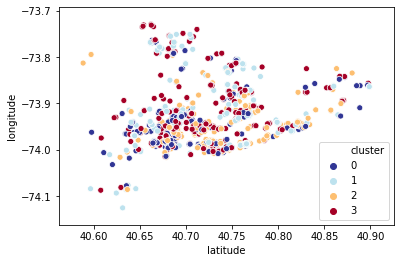

In [44]:
#new york
sns.scatterplot(x = 'latitude', y='longitude', data = listing_cluster.loc[listing_cluster.city=='new york'],hue = 'cluster', palette='RdYlBu_r')

#### Plotting san fransisco listings with cluster as hue

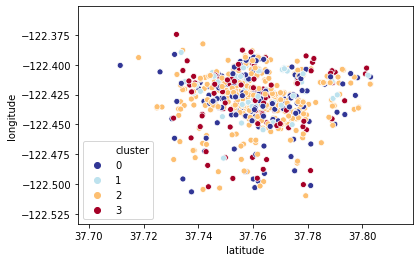

In [45]:
#san fransisco
sns.scatterplot(x = 'latitude', y='longitude', data = listing_cluster.loc[listing_cluster.city=='san fransisco'],hue = 'cluster', palette='RdYlBu_r')

#### Plotting average price for different room type in each cluster

In [60]:
ct = pd.crosstab(listing_cluster.cluster, listing_cluster.room_type, values=listing_cluster.price,aggfunc=np.mean)

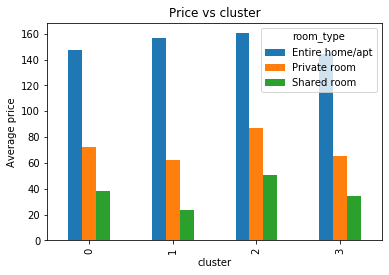

In [61]:
ct.plot.bar()
plt.title(label='Price vs cluster')
plt.ylabel('Average price')
plt.show()

#### Plotting number of reviews for different room types in each cluster

In [48]:
ct = pd.crosstab(listing_cluster.cluster, listing_cluster.room_type, values=listing_cluster.number_of_reviews,aggfunc=np.mean)

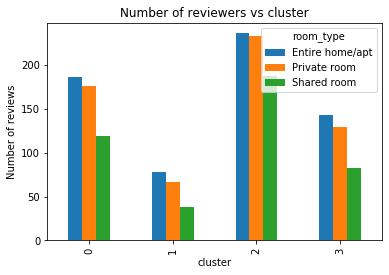

In [58]:
ct.plot.bar()
plt.title(label='Number of reviewers vs cluster')
plt.ylabel('Number of reviews')
plt.show()

In [1]:
#listings with higher average number of listings are grouped in cluster 2 